In [15]:
import joblib
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load models and vectorizer
log_model = joblib.load("D:/AMITY/Semester_4/5. Major Project/mba-semester4-major-project-qollabb/ProjectApp/models/logistic_model.pkl")
svm_model = joblib.load("D:/AMITY/Semester_4/5. Major Project/mba-semester4-major-project-qollabb/ProjectApp/models/svm_model.pkl")
vectorizer = joblib.load("D:/AMITY/Semester_4/5. Major Project/mba-semester4-major-project-qollabb/ProjectApp/models/tfidf_vectorizer.pkl")

# # Function to preprocess text
# def preprocess_text(text):
#     # Basic text preprocessing: lowercasing and removing non-alphanumeric characters
#     text = text.lower()
#     text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and numbers
#     return text

# Function to classify new text input
def classify_text(text):
    # Preprocess and vectorize the text
    text_vectorized = vectorizer.transform([text])
    
    # Predict using both models
    log_pred = log_model.predict(text_vectorized)
    svm_pred = svm_model.predict(text_vectorized)
    
    # Print results
    log_sentiment = "Positive" if log_pred == 1 else "Negative"
    svm_sentiment = "Positive" if svm_pred == 1 else "Negative"
    
    # print(log_pred)
    # print(svm_pred)
    
    print(f"Logistic Regression Prediction: {log_sentiment}")
    print(f"SVM Prediction: {svm_sentiment}")
    
    return log_sentiment, svm_sentiment


In [20]:
# Example usage: Classify some text
text_input = input("Enter the text for classification: ")
print(f"Provided Feedback: {text_input}\n")

classify_text(text_input)

Provided Feedback: The buses are always late and poorly maintained. We are dissatisfied and unhappy.

Logistic Regression Prediction: Negative
SVM Prediction: Negative


('Negative', 'Negative')

In [3]:
# Load test data for model evaluation
df = pd.read_csv("D:/AMITY/Semester_4/5. Major Project/mba-semester4-major-project-qollabb/ProjectApp/data/processed/cleaned_feedback_with_text.csv")
df['label'] = df['local_service_satisfaction'].apply(lambda x: 1 if x in ['very satisfied', 'satisfied', 'good', 'very good'] else 0)

X = vectorizer.transform(df['full_feedback'])
y = df['label']



Logistic Regression Performance:

              precision    recall  f1-score   support

           0       1.00      0.61      0.76      4164
           1       0.00      0.00      0.00         0

    accuracy                           0.61      4164
   macro avg       0.50      0.31      0.38      4164
weighted avg       1.00      0.61      0.76      4164



d:\AMITY\Semester_4\5. Major Project\mba-semester4-major-project-qollabb\ProjectApp\projectenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\AMITY\Semester_4\5. Major Project\mba-semester4-major-project-qollabb\ProjectApp\projectenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\AMITY\Semester_4\5. Major Project\mba-semester4-major-project-qollabb\ProjectApp\projectenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with 

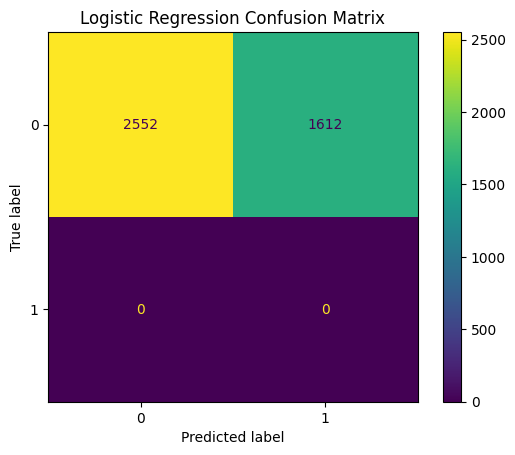

In [18]:
# Logistic Regression Evaluation
log_preds = log_model.predict(X)
print("\nLogistic Regression Performance:\n")
print(classification_report(y, log_preds))
cm_log = confusion_matrix(y, log_preds)
ConfusionMatrixDisplay(cm_log).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()


SVM Performance:

              precision    recall  f1-score   support

           0       1.00      0.57      0.73      4164
           1       0.00      0.00      0.00         0

    accuracy                           0.57      4164
   macro avg       0.50      0.29      0.36      4164
weighted avg       1.00      0.57      0.73      4164



d:\AMITY\Semester_4\5. Major Project\mba-semester4-major-project-qollabb\ProjectApp\projectenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\AMITY\Semester_4\5. Major Project\mba-semester4-major-project-qollabb\ProjectApp\projectenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\AMITY\Semester_4\5. Major Project\mba-semester4-major-project-qollabb\ProjectApp\projectenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with 

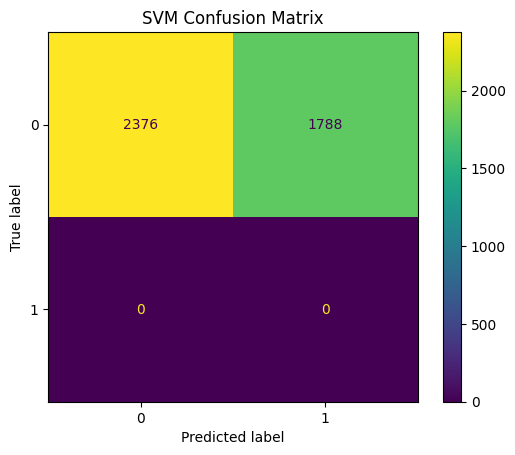


Evaluation completed.


In [19]:
# SVM Evaluation
svm_preds = svm_model.predict(X)
print("\nSVM Performance:\n")
print(classification_report(y, svm_preds))
cm_svm = confusion_matrix(y, svm_preds)
ConfusionMatrixDisplay(cm_svm).plot()
plt.title("SVM Confusion Matrix")
plt.show()

print("\nEvaluation completed.")